# Egzamin z PSO - styczeń 2018

## Pytania opisowe (40% punktów)

Jak wygląda symetria transformaty Fouriera dla sygnałów jednowymiarowych?

Jakie znasz algorytmy do liczenia filtrów IIR?

Na czym polega układ antyprzyczynowy?

Na czym polega różnica między wzorem analitycznym i syntetycznym transformaty Fouriera?

Jaka jest częstotliwość sygnału próbkowanego częstotliwością 1 kHz, jeśli jego częstotliwość rzeczywista wynosi 1200 Hz?

Czym jest moc sygnału?

Na czym polega liczenie SNR i do czego służy?

Czy operacja splotu jest przemienna (czy kolejność operandów jest istotna)?

Jakie są różnice pomiędzy DFT a DCT?

Co to jest próbkowanie?

## Sygnały 1-D (30% punktów)

Wczytaj sygnał z pliku *zdanie.wav* i dokonaj konwersji próbki używając reprezentacji 3 bitów na próbkę. Narysuj sygnał przed i po oraz wylicz miarę SNR dokonanej konwersji.

In [2]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [13]:
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")
z = y.astype(float) - y.min()
z = z/z.max()
z = floor(4*z)


FileNotFoundError: [Errno 2] No such file or directory: 'zdanie.wav'

Zaprojektuj dowolny filtr IIR, który usunie z pliku *zdanie.wav* wszystkie częstotliwości oprócz zakresu 800-2000 Hz. Narysuj widmo sygnału przed i po konwersji.

In [25]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")

Y = fft.rfft(y)
N = Y.size
x = arange(0, N, 1)

mask_s = zeros(N)
mask_s[np.where(x < 200)] = 1
Ysmall = Y * mask_s
y_small = fft.irfft(Ysmall)

mask_m = zeros(N)
mask_m[np.where((x > 500)*(x < 850))] = 1
Ymid = Y * mask_m
y_mid = fft.irfft(Ymid)

mask_l = zeros(N)
mask_l[np.where((x > 800)*(x < 2000))] = 1
Ylarge = Y * mask_l
y_large = fft.irfft(Ylarge)

display(Audio(y, rate=fs))
display(Audio(y_small, rate=fs))
display(Audio(y_mid, rate=fs))
display(Audio(y_large, rate=fs))

FileNotFoundError: [Errno 2] No such file or directory: 'zdanie.wav'

## Sygnały 2-D (30% punktów)

Użyj progowania na obrazie *text.png*, żeby wyizolować na zdjęciu tylko tekst. Postaraj się, żeby cały tekst był widoczny.

In [11]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


/usr/local/lib/python3.4/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


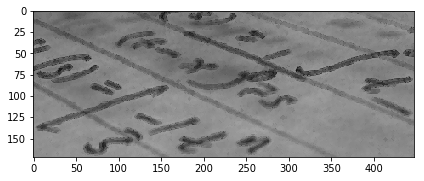

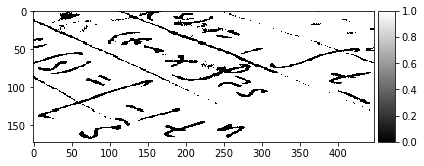

In [20]:
from skimage import data, color, transform, io, filters, morphology
    
i = data.text()

t = filters.rank.otsu(i, selem = morphology.disk(2))

th = 100
i[i < th] = 0
i[i > 0] = 1

io.imshow(t, cmap=cm.gray)
figure()
io.imshow(i, cmap=cm.gray)




Wczytaj obraz *noisy_f.png* i usuń z niego szum używając metody filtrowania w dziedzinie częstotliwości.

(314, 509)


FileNotFoundError: [Errno 2] No such file or directory: '/home/stud10noisy_f.png'

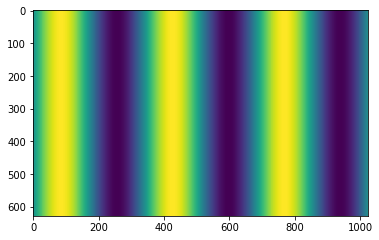

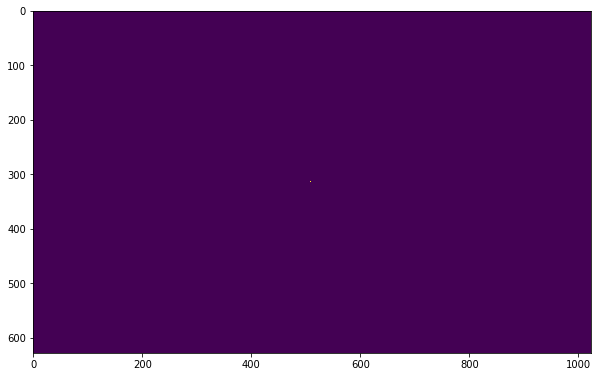

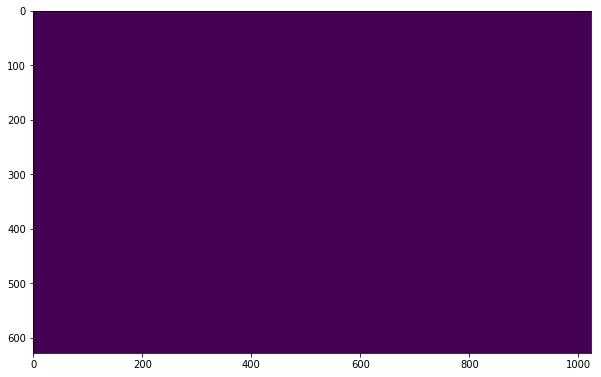

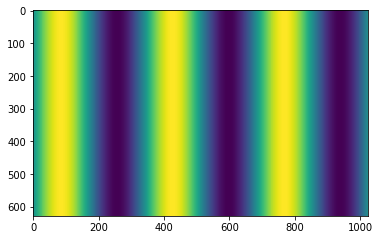

In [31]:
import numpy as np


W = 1024
He = 628
x, y = meshgrid(arange(W), arange(He))
A = 1
f = 3
ph = 0
I = A*sin(2*pi*f*x/W + ph)
imshow(I)

H = fft.fft2(I)
H = fft.fftshift(H)
figure(figsize=(10, 10))
imshow(abs(H))

print(unravel_index(H.argmax(), H.shape))

H[int(He//2), 509] = 1
figure(figsize=(10, 10))
imshow(abs(H))

H = fft.fftshift(H)
I = fft.ifft2(H)
I = I.real
figure()
imshow(I)

i = data.load(os.getcwd() + "noisy_f.png")


print(i.shape)
imshow(i)

H = fft.fft2(i)
H = fft.fftshift(H)
figure(figsize=(10, 10))
imshow(log(abs(H)))

H[int(He/2), 509] = 1
figure(figsize=(10, 10))
imshow(log(abs(H)))

H = fft.fftshift(H)
I = fft.ifft2(H)
I = I.real
I = exposure.equalize_hist(I)
figure()
imshow(I)

# Ostateczna ocena
Pytania: 57.500000%

Sygnały 1D: 12.500000%

Sygnały 2D: 30.000000%

**Suma punktów za całość: 35.750000%**

## Ocena: 2